In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# checking for the missing values.
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
df['Age'] = df['Age'].fillna(df['Age'].median()) #filling age column

In [8]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0]) #filling embarked column

In [9]:
df.drop(columns=['Cabin'], inplace=True) #droping cabin column because it has large amount of missing values

In [10]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


**Visualization**

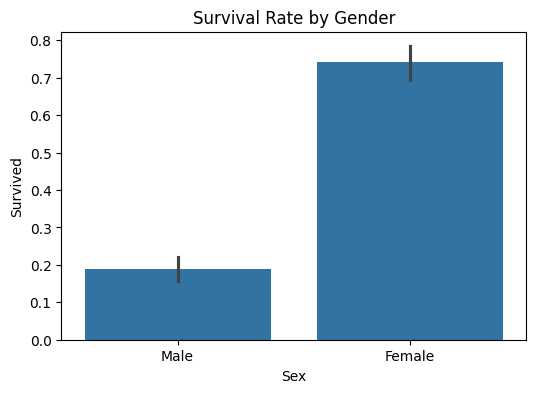

In [14]:
# Countplot for survival based on gender
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.title("Survival Rate by Gender")
plt.show()

In [15]:
# Survival rate by gender
gender_survival = df.groupby('Sex')['Survived'].mean() * 100
print(gender_survival)


Sex
0    18.890815
1    74.203822
Name: Survived, dtype: float64


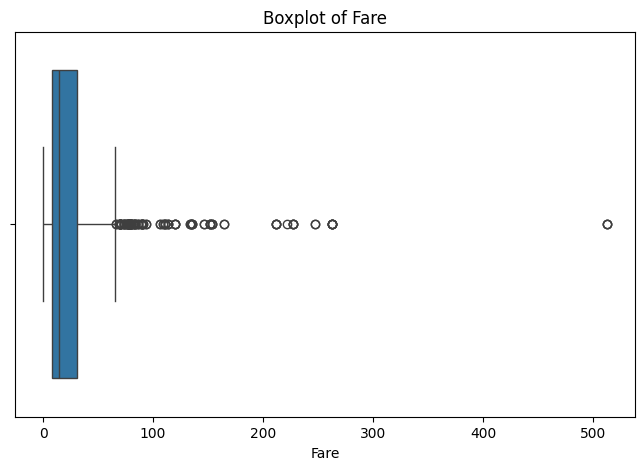

In [16]:
# Outlier Detection (Boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()

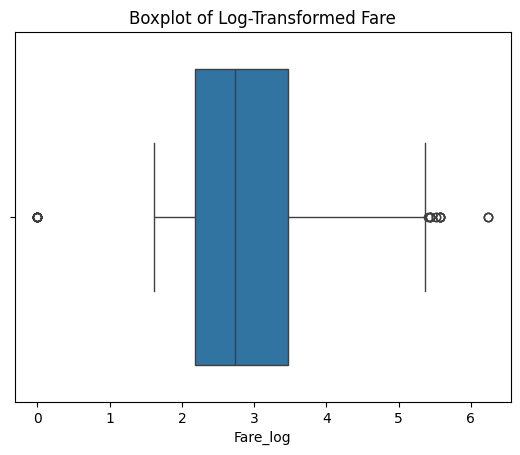

In [17]:
df['Fare_log'] = np.log1p(df['Fare'])  # log(1+Fare) to handle zero values
sns.boxplot(x=df['Fare_log'])
plt.title("Boxplot of Log-Transformed Fare")
plt.show()


In [18]:
upper_limit = df['Fare'].quantile(0.95)  # Setting upper bound at 95th percentile
df['Fare'] = np.where(df['Fare'] > upper_limit, upper_limit, df['Fare'])


In [19]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]


In [20]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]


In [21]:
df = df[df['Fare'] <= 50]

df['Fare_log'] = np.log1p(df['Fare'])  # log(1+Fare) to avoid log(0) issues


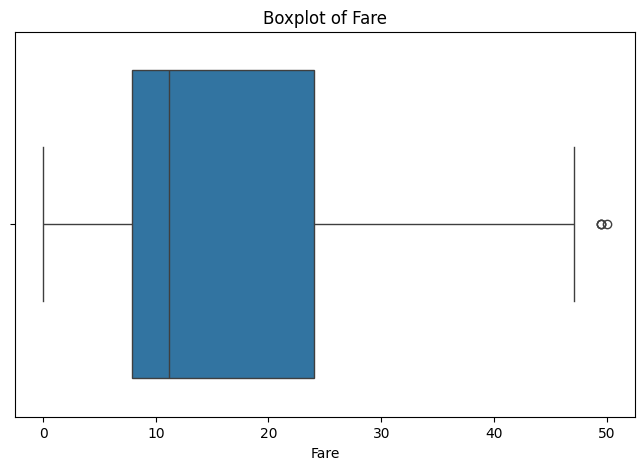

In [22]:
# Outlier Detection (Boxplot)2
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Fare'])
plt.title("Boxplot of Fare")
plt.show()

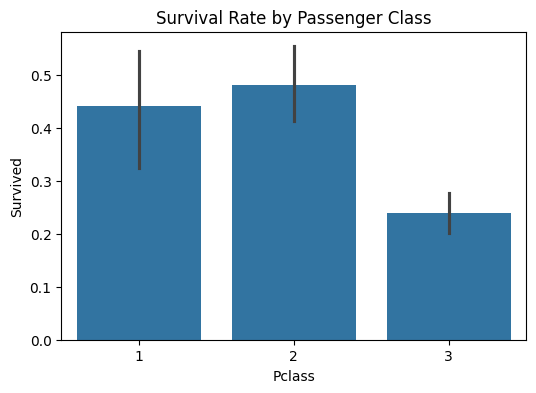

In [23]:
#survival rate by passenger's class
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

In [24]:
# Survival rate by passenger class
class_survival = df.groupby('Pclass')['Survived'].mean() * 100
print(class_survival)


Pclass
1    44.155844
2    48.022599
3    23.899371
Name: Survived, dtype: float64


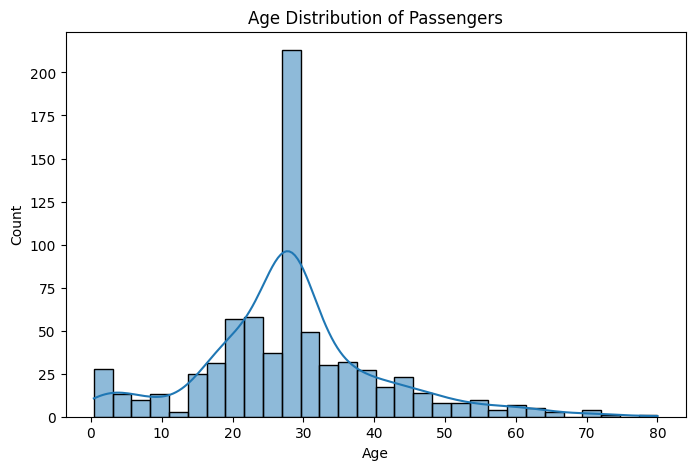

In [25]:
#Age Distribution of Passengers
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.show()


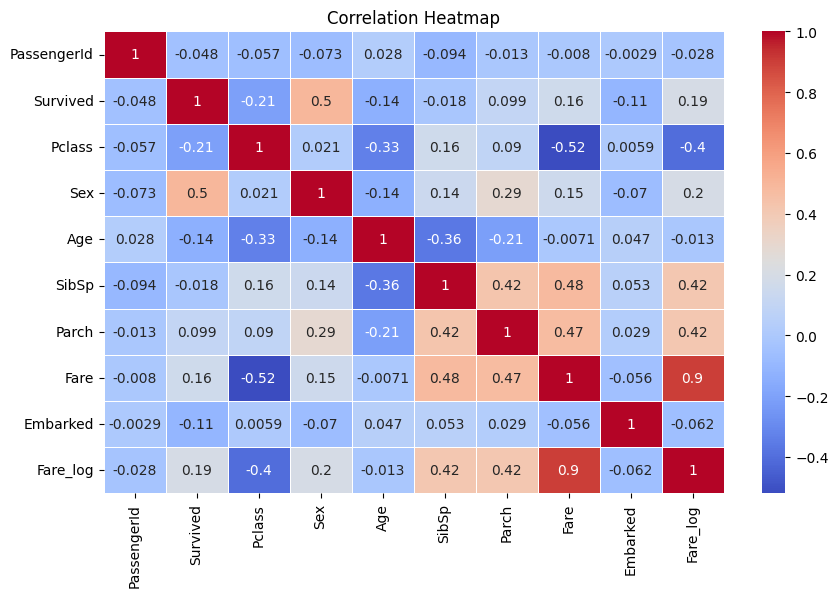

In [26]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

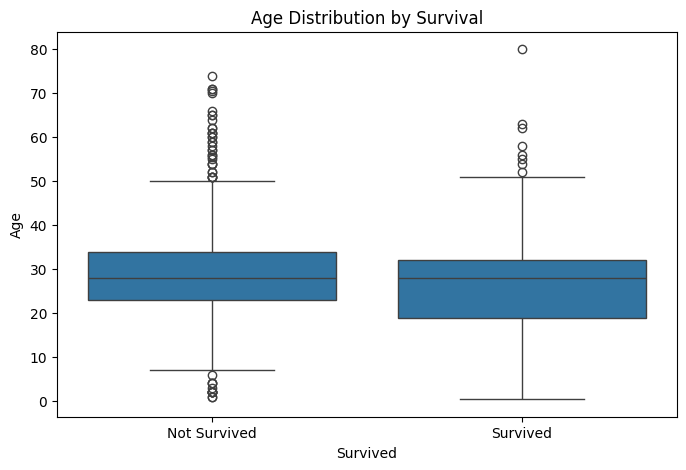

In [27]:
#Age vs Survival
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.title("Age Distribution by Survival")
plt.show()


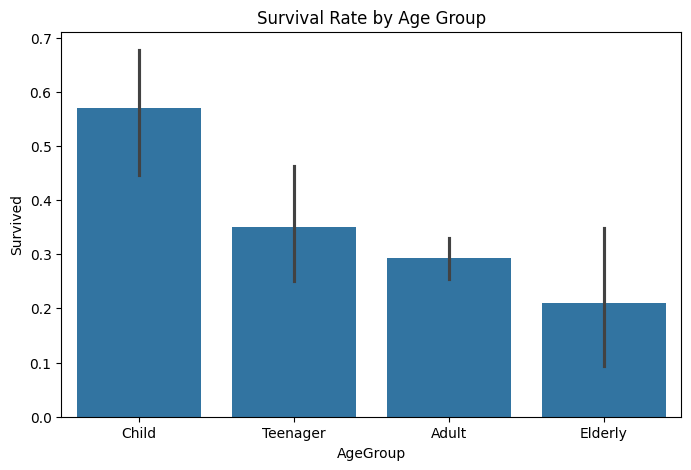

In [28]:
# Define age groups
bins = [0, 12, 19, 50, 100]
labels = ['Child', 'Teenager', 'Adult', 'Elderly']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Plot survival rate by age group
plt.figure(figsize=(8,5))
sns.barplot(x='AgeGroup', y='Survived', data=df, order=['Child', 'Teenager', 'Adult', 'Elderly'])
plt.title("Survival Rate by Age Group")
plt.show()


In [29]:
# Survival rate by age group
age_survival = df.groupby('AgeGroup', observed=False)['Survived'].mean() * 100
print(age_survival)

AgeGroup
Child       56.923077
Teenager    35.000000
Adult       29.281768
Elderly     20.930233
Name: Survived, dtype: float64


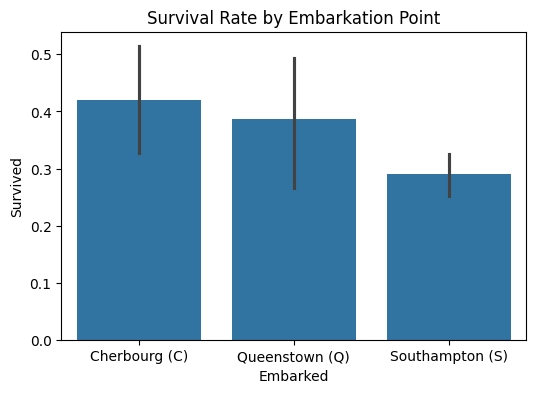

In [30]:
#Survival Rate by Embarkation Point
plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])
plt.title("Survival Rate by Embarkation Point")
plt.show()


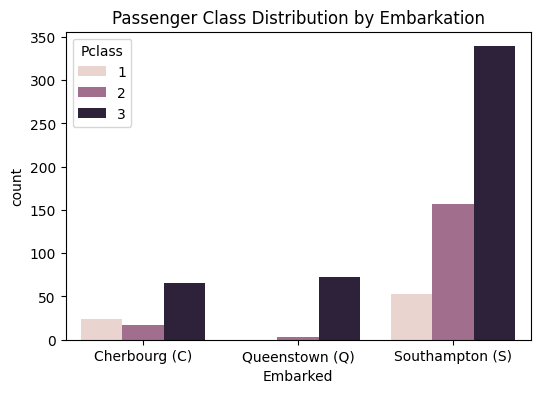

In [31]:
#Passenger Class Distribution by Embarkation
plt.figure(figsize=(6,4))
sns.countplot(x='Embarked', hue='Pclass', data=df)
plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)'])
plt.title("Passenger Class Distribution by Embarkation")
plt.show()


In [32]:
# Survival rate by embarkation port
embark_survival = df.groupby('Embarked')['Survived'].mean() * 100
print(embark_survival)

Embarked
0    42.056075
1    38.666667
2    28.961749
Name: Survived, dtype: float64


In [33]:
# Overall survival rate
overall_survival = df['Survived'].mean() * 100
print(f"Overall Survival Rate: {overall_survival:.2f}%")


Overall Survival Rate: 31.87%
